In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



The dataset contains following Features:

1. ID: Unique identifier for each delivery.
2. Delivery_person_ID: Unique identifier for each delivery person.
3. Delivery_person_Age: Age of the delivery person.
4. Delivery_person_Ratings: Ratings assigned to the delivery person.
5. Restaurant_latitude: Latitude of the restaurant.
6. Restaurant_longitude: Longitude of the restaurant.
7. Delivery_location_latitude: Latitude of the delivery location.
8. Delivery_location_longitude: Longitude of the delivery location.
9. Order_Date: Date of the order.
10. Time_Ordered: Time the order was placed.
11. Time_Order_picked: Time the order was picked up for delivery.
12. Weather_conditions: Weather conditions at the time of delivery.
13. Road_traffic_density: Density of road traffic during delivery.
14. Vehicle_condition: Condition of the delivery vehicle.
15. Type_of_order: Type of order (e.g., dine-in, takeaway, delivery).
16. Type_of_vehicle: Type of vehicle used for delivery.
17. Multiple_deliveries: Indicator of whether multiple deliveries were made in the same trip.
18. Festival: Indicator of whether the delivery coincided with a festival.
19. City: City where the delivery took place.
20. Time_taken (min): Time taken for delivery in minutes.


In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10,17:15,Fog,Medium,2,Snack,scooter,1.0,No,Metropolitian,36


In [5]:
df.shape

(45584, 20)

In [6]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [90]:
# Lowering all the columns so there is no typo while mentioning column names
df.columns = [col.lower() for col in df.columns]

In [91]:
# Rename the column
df.rename(columns = {"time_taken (min)" : "time_taken_min"},inplace = True)

In [92]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45584 non-null  object 
 1   delivery_person_id           45584 non-null  object 
 2   delivery_person_age          43730 non-null  float64
 3   delivery_person_ratings      43676 non-null  float64
 4   restaurant_latitude          45584 non-null  float64
 5   restaurant_longitude         45584 non-null  float64
 6   delivery_location_latitude   45584 non-null  float64
 7   delivery_location_longitude  45584 non-null  float64
 8   order_date                   45584 non-null  object 
 9   time_orderd                  43853 non-null  object 
 10  time_order_picked            45584 non-null  object 
 11  weather_conditions           44968 non-null  object 
 12  road_traffic_density         44983 non-null  object 
 13  vehicle_conditio

In [93]:
# Display the data type of each column in a DataFrame
df.dtypes


id                              object
delivery_person_id              object
delivery_person_age            float64
delivery_person_ratings        float64
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
order_date                      object
time_orderd                     object
time_order_picked               object
weather_conditions              object
road_traffic_density            object
vehicle_condition                int64
type_of_order                   object
type_of_vehicle                 object
multiple_deliveries            float64
festival                        object
city                            object
time_taken_min                   int64
dtype: object

In [94]:
# Change data types of columns order_date to datetime 
df['order_date'] = pd.to_datetime(df["order_date"],format="%d-%m-%Y")

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           45584 non-null  object        
 1   delivery_person_id           45584 non-null  object        
 2   delivery_person_age          43730 non-null  float64       
 3   delivery_person_ratings      43676 non-null  float64       
 4   restaurant_latitude          45584 non-null  float64       
 5   restaurant_longitude         45584 non-null  float64       
 6   delivery_location_latitude   45584 non-null  float64       
 7   delivery_location_longitude  45584 non-null  float64       
 8   order_date                   45584 non-null  datetime64[ns]
 9   time_orderd                  43853 non-null  object        
 10  time_order_picked            45584 non-null  object        
 11  weather_conditions           44968 non-nu

### Summary Statistics for Numerical Variables¶

In [96]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
delivery_person_age,43730.0,29.566911,5.815064,15.000000,25.000000,30.000000,35.000000,50.000000
delivery_person_ratings,43676.0,4.633774,0.334744,1.000000,4.500000,4.700000,4.900000,6.000000
restaurant_latitude,45584.0,17.017948,8.185674,-30.905562,12.933284,18.551440,22.728163,30.914057
restaurant_longitude,45584.0,70.229684,22.885575,-88.366217,73.170000,75.897963,78.044095,88.433452
delivery_location_latitude,45584.0,17.465480,7.335562,0.010000,12.988453,18.633934,22.785049,31.054057
delivery_location_longitude,45584.0,70.844161,21.120578,0.010000,73.280000,76.002574,78.107044,88.563452
vehicle_condition,45584.0,1.023385,0.839055,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44591.0,0.744635,0.572510,0.000000,0.000000,1.000000,1.000000,3.000000
time_taken_min,45584.0,26.293963,9.384298,10.000000,19.000000,26.000000,32.000000,54.000000


### Summary Statistics for Categorical Variables

In [97]:
df.describe(include = "object").T

,count,unique,top,freq
id,45584,45584,0xcdcd,1
delivery_person_id,45584,1320,JAPRES11DEL02,67
time_orderd,43853,176,21:55,461
time_order_picked,45584,193,21:30,495
weather_conditions,44968,6,Fog,7653
road_traffic_density,44983,4,Low,15476
type_of_order,45584,4,Snack,11530
type_of_vehicle,45584,4,motorcycle,26429
festival,45356,2,No,44460
city,44384,3,Metropolitian,34087


### Missing Values Treatment¶


In [98]:
# Checking null values
(df.isnull().sum()/len(df)) * 100

id                             0.000000
delivery_person_id             0.000000
delivery_person_age            4.067217
delivery_person_ratings        4.185679
restaurant_latitude            0.000000
restaurant_longitude           0.000000
delivery_location_latitude     0.000000
delivery_location_longitude    0.000000
order_date                     0.000000
time_orderd                    3.797385
time_order_picked              0.000000
weather_conditions             1.351351
road_traffic_density           1.318445
vehicle_condition              0.000000
type_of_order                  0.000000
type_of_vehicle                0.000000
multiple_deliveries            2.178396
festival                       0.500176
city                           2.632503
time_taken_min                 0.000000
dtype: float64

There are missing values in the columns such as delivery_person_age, delivery_person_ratings, time_orderd, weather_conditions, road_traffic_density, multiple_deliveries, and city.
Since the missing values constitute less than 5% of the data, we will proceed to drop these missing values.

In [99]:
# Drop the missing values
df.dropna(inplace = True)

In [100]:
# Checking null values
(df.isnull().sum()/len(df)) * 100

id                             0.0
delivery_person_id             0.0
delivery_person_age            0.0
delivery_person_ratings        0.0
restaurant_latitude            0.0
restaurant_longitude           0.0
delivery_location_latitude     0.0
delivery_location_longitude    0.0
order_date                     0.0
time_orderd                    0.0
time_order_picked              0.0
weather_conditions             0.0
road_traffic_density           0.0
vehicle_condition              0.0
type_of_order                  0.0
type_of_vehicle                0.0
multiple_deliveries            0.0
festival                       0.0
city                           0.0
time_taken_min                 0.0
dtype: float64

In [101]:
# Check for Duplicate values
df.duplicated().sum()

0

In [102]:
df.nunique()

id                             41359
delivery_person_id              1320
delivery_person_age               20
delivery_person_ratings           26
restaurant_latitude              487
restaurant_longitude             389
delivery_location_latitude      4361
delivery_location_longitude     4361
order_date                        44
time_orderd                      176
time_order_picked                193
weather_conditions                 6
road_traffic_density               4
vehicle_condition                  3
type_of_order                      4
type_of_vehicle                    3
multiple_deliveries                4
festival                           2
city                               3
time_taken_min                    45
dtype: int64

In [103]:
import numpy as np

# Fix sign errors (make all coordinates positive)
for col in ["restaurant_latitude", "restaurant_longitude", "delivery_location_latitude", "delivery_location_longitude"]:
    df[col] = df[col].abs()


### Creating new features

In [104]:
# Extractin month from the order date column

df['order_month'] = pd.DatetimeIndex(df['order_date']).strftime('%b')

In [105]:
df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,order_month
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,Feb
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,Feb
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,Mar
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,Feb
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,Feb


In [106]:
#Creating new feature for age bins for further analysis
age = [20,25,30,35,40]
label = ["20-24","25-29","30-34","35+"]
df["age_bins"] = pd.cut(df["delivery_person_age"],bins = age,labels=label)

In [107]:
# Creating peak hour indicating whether an order was placed during peak hours

df['time_orderd'] = pd.to_datetime(df['time_orderd'], format='%H:%M', errors='coerce')

def is_peak_hour(df):
    hour = pd.to_datetime(df['time_orderd']).hour
    return 1 if (11 <= hour < 14) or (17 <= hour < 21) else 0

df['peak_hours'] = df.apply(is_peak_hour, axis=1)

In [108]:
df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,order_month,age_bins,peak_hours
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,1900-01-01 21:55:00,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,Feb,35+,0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,Feb,20-24,0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,1,Drinks,scooter,1.0,No,Metropolitian,21,Mar,20-24,1
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,Feb,30-34,0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,1,Snack,scooter,1.0,No,Metropolitian,41,Feb,20-24,1


### Outlier Treatment¶

In [109]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
delivery_person_age,41359.0,29.609783,20.0,25.0,30.0,35.0,39.0,5.764045
delivery_person_ratings,41359.0,4.633202,2.5,4.5,4.7,4.9,5.0,0.315887
restaurant_latitude,41359.0,17.408884,0.0,12.934179,18.56245,22.732225,30.914057,7.336161
restaurant_longitude,41359.0,70.775773,0.0,73.170283,75.898497,78.045359,88.433452,21.124028
delivery_location_latitude,41359.0,17.472763,0.01,12.989096,18.636947,22.785536,31.054057,7.337562
delivery_location_longitude,41359.0,70.839652,0.01,73.278436,76.002471,78.107079,88.563452,21.12423
order_date,41359,2022-03-13 16:00:34.120747776,2022-02-11 00:00:00,2022-03-04 00:00:00,2022-03-15 00:00:00,2022-03-27 00:00:00,2022-04-06 00:00:00,NaN
time_orderd,37525,1900-01-01 18:07:49.766822144,1900-01-01 08:10:00,1900-01-01 15:55:00,1900-01-01 19:20:00,1900-01-01 21:35:00,1900-01-01 23:55:00,NaN
vehicle_condition,41359.0,0.995914,0.0,0.0,1.0,2.0,2.0,0.81798
multiple_deliveries,41359.0,0.748108,0.0,0.0,1.0,1.0,3.0,0.572974


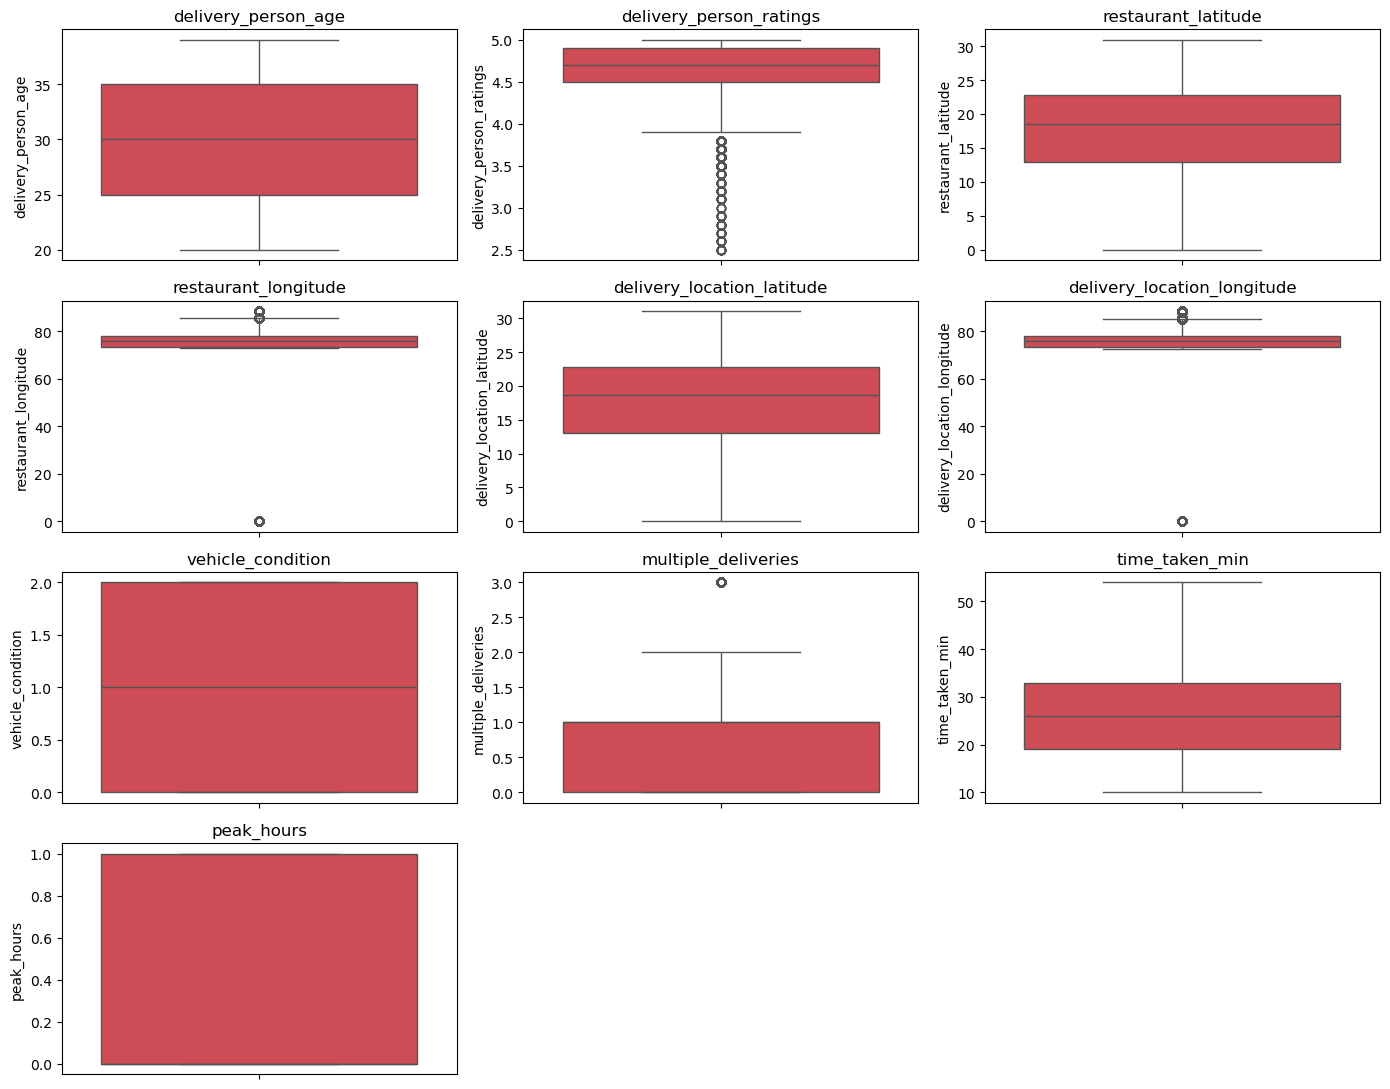

In [110]:
numeric_columns = df.select_dtypes(include=["number"])

plt.figure(figsize=(14,11))
for i,col in enumerate (numeric_columns.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(df[col],color="#E23744")
  plt.title(col)
plt.tight_layout()
plt.show()


In [111]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=["number"])

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Print the count of outliers for each numerical column
for col, count in outlier_counts.items():
    print(f"Count of outliers present in {col}: {count}")
    print(f"% Count of outliers present in {col}: {count/ len(df)*100}\n")


Count of outliers present in delivery_person_age: 0
% Count of outliers present in delivery_person_age: 0.0

Count of outliers present in delivery_person_ratings: 1099
% Count of outliers present in delivery_person_ratings: 2.657220919267874

Count of outliers present in restaurant_latitude: 0
% Count of outliers present in restaurant_latitude: 0.0

Count of outliers present in restaurant_longitude: 4097
% Count of outliers present in restaurant_longitude: 9.905945501583693

Count of outliers present in delivery_location_latitude: 0
% Count of outliers present in delivery_location_latitude: 0.0

Count of outliers present in delivery_location_longitude: 5900
% Count of outliers present in delivery_location_longitude: 14.265335235378032

Count of outliers present in vehicle_condition: 0
% Count of outliers present in vehicle_condition: 0.0

Count of outliers present in multiple_deliveries: 337
% Count of outliers present in multiple_deliveries: 0.8148166058173553

Count of outliers prese

In [112]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers for each numeric column
for col in numeric_columns.columns:
    df[col] = remove_outliers(df[col])

# Drop rows with NaN values created by removing outliers
df = df.dropna().reset_index(drop=True)


### Univariate and Bivariate Analysis¶


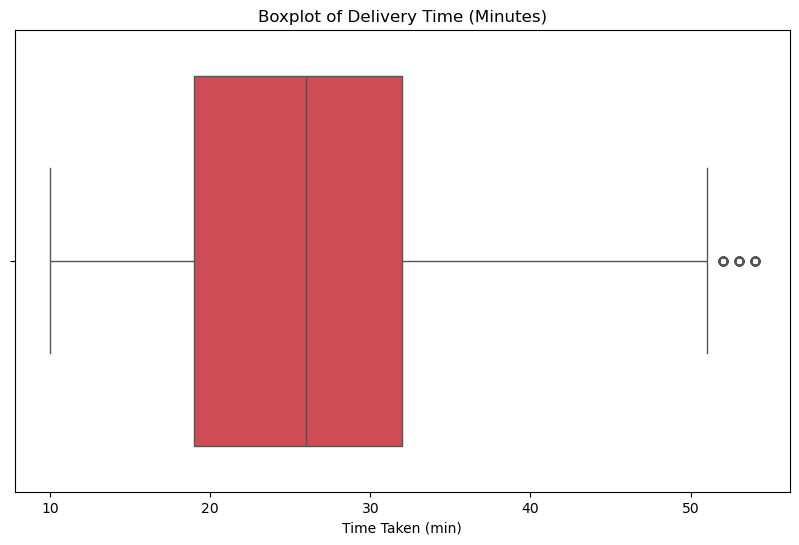

In [113]:
# Boxplot for Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['time_taken_min'],color="#E23744")
plt.title('Boxplot of Delivery Time (Minutes)')
plt.xlabel('Time Taken (min)')
plt.show()


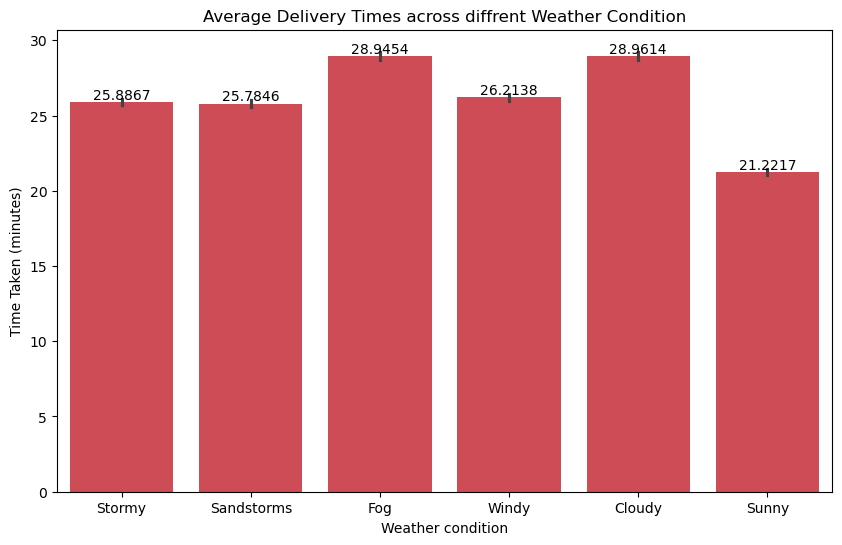

In [114]:
#Bar plot comparing average delivery times across different weather condition.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="weather_conditions", y="time_taken_min", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times across diffrent Weather Condition")
plt.xlabel("Weather condition")
plt.ylabel("Time Taken (minutes)")
plt.show()


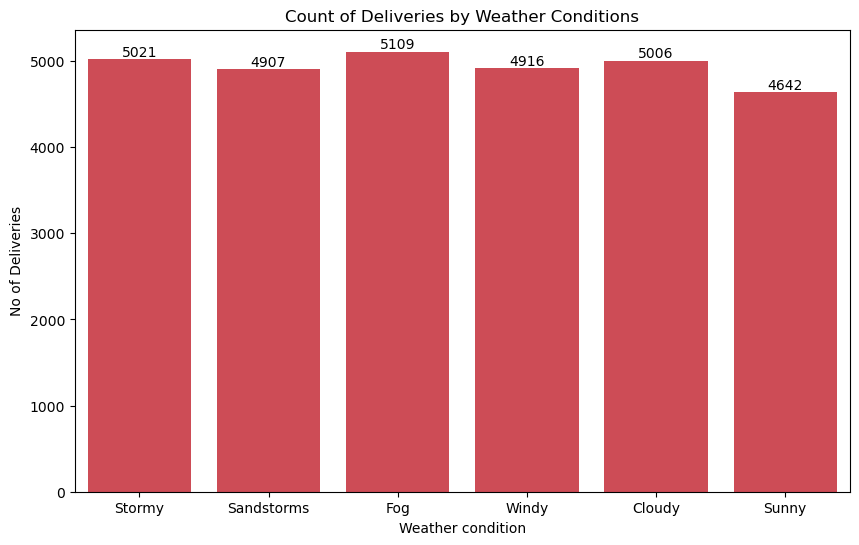

In [115]:
#Bar plot comparing Count of Deliveries by Weather Conditions.

plt.figure(figsize=(10, 6))
ax = sns.countplot(x = "weather_conditions", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Count of Deliveries by Weather Conditions")
plt.xlabel("Weather condition")
plt.ylabel("No of Deliveries")
plt.show()


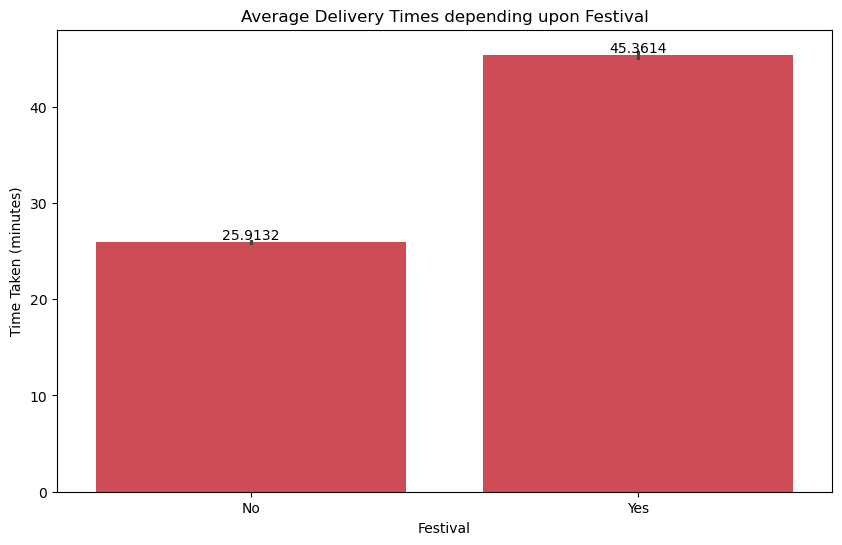

In [116]:
#Bar plot comparing average delivery times depending upon Festival.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="festival", y="time_taken_min", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times depending upon Festival")
plt.xlabel("Festival")
plt.ylabel("Time Taken (minutes)")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13672\1466526782.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#E23744'` for the same effect.

  ax = sns.barplot(x="type_of_vehicle", y="time_taken_min",hue="peak_hours", data=df,color="#E23744")


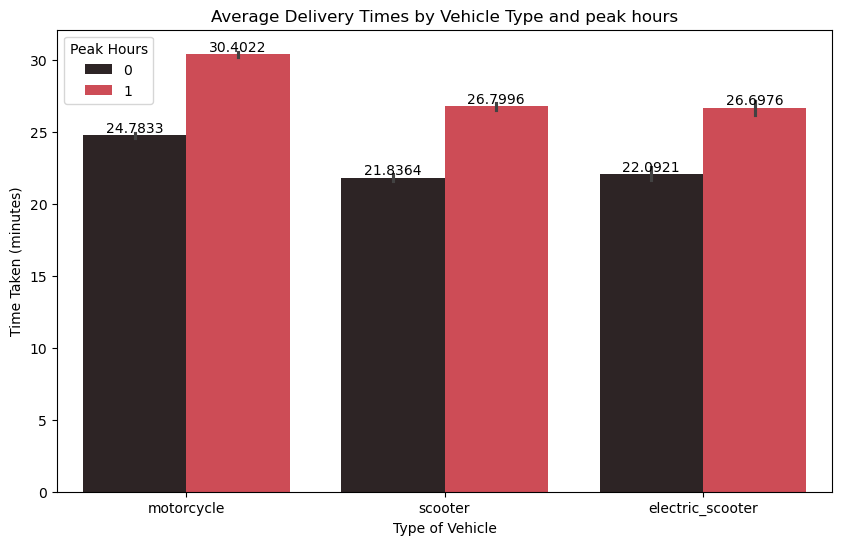

In [117]:
#Bar plot comparing average delivery times across different vehicle types and Peak Hours.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="type_of_vehicle", y="time_taken_min",hue="peak_hours", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times by Vehicle Type and peak hours")
plt.xlabel("Type of Vehicle")
plt.ylabel("Time Taken (minutes)")
plt.legend(title = "Peak Hours")
plt.show()


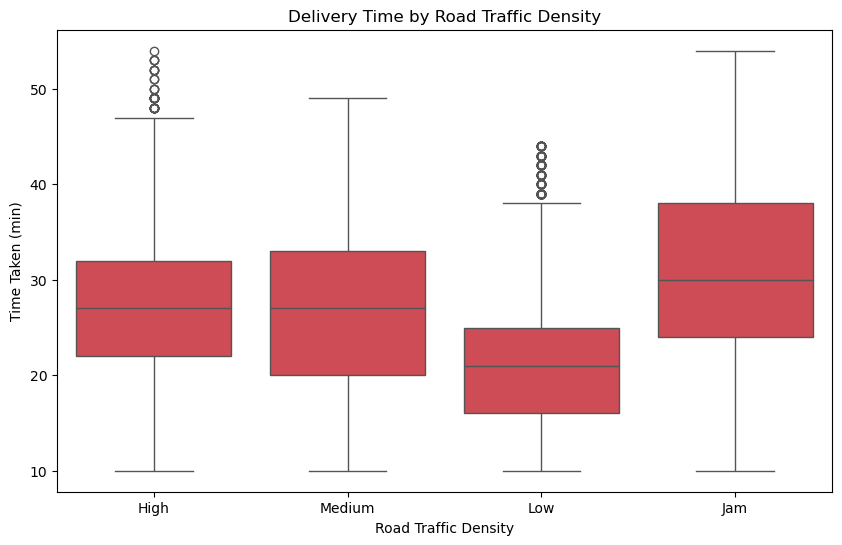

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='road_traffic_density', y='time_taken_min', data=df,color="#E23744")
plt.title('Delivery Time by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.show()


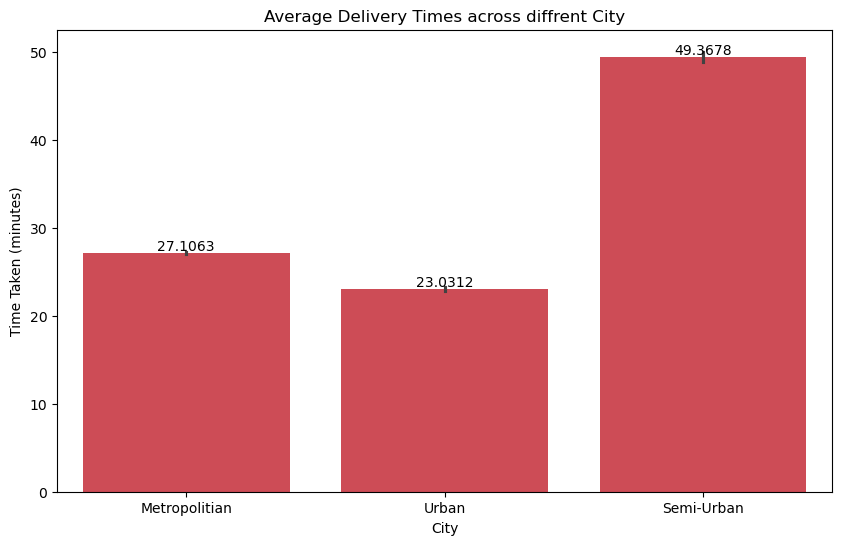

In [119]:
#Bar plot comparing average delivery times across different City.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="city", y="time_taken_min", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times across diffrent City")
plt.xlabel("City")
plt.ylabel("Time Taken (minutes)")
plt.show()


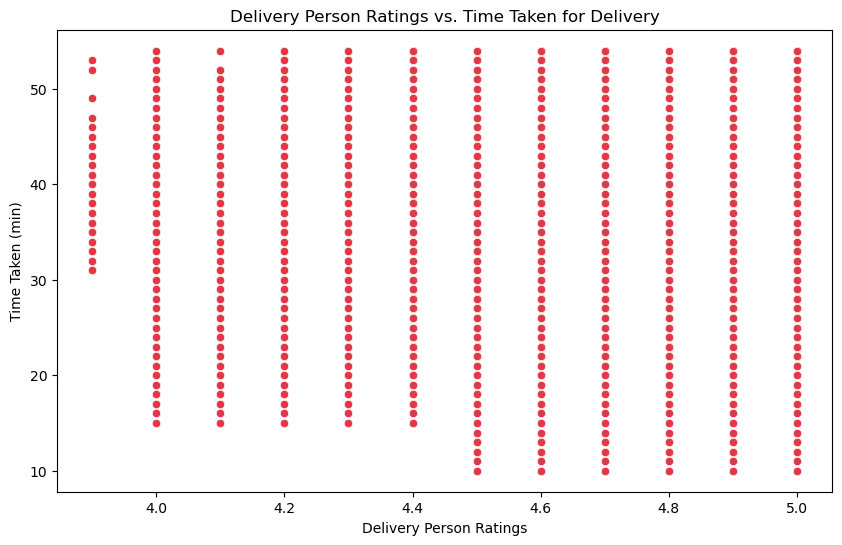

In [120]:
#Scatter plot comparing average delivery times VS Delivery Person Rating.

plt.figure(figsize=(10, 6))
sns.scatterplot(x="delivery_person_ratings", y="time_taken_min", data=df,color="#E23744")
plt.title("Delivery Person Ratings vs. Time Taken for Delivery")
plt.xlabel("Delivery Person Ratings")
plt.ylabel("Time Taken (min)")
plt.show()


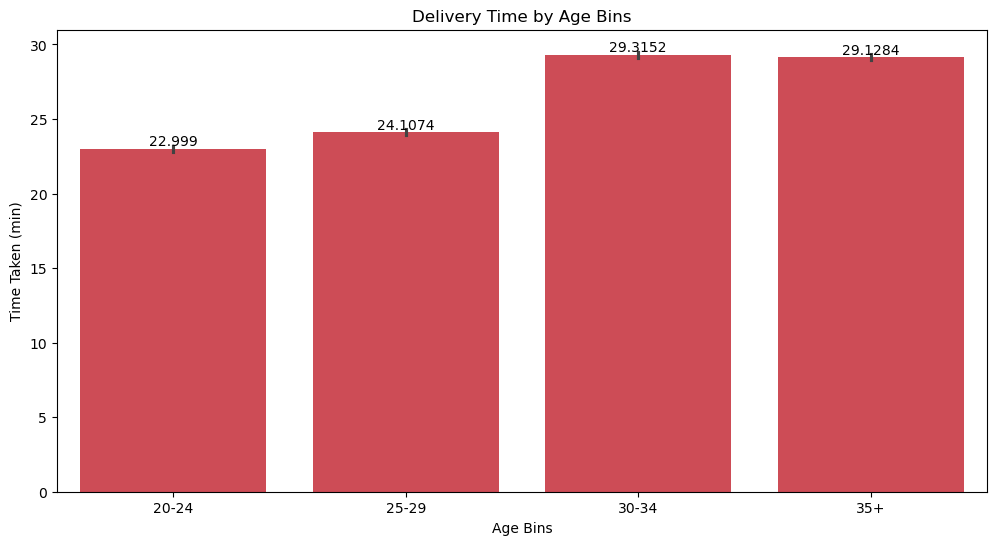

In [121]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="age_bins", y="time_taken_min",  data=df,color="#E23744")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Delivery Time by Age Bins")
plt.xlabel("Age Bins")
plt.ylabel("Time Taken (min)")
plt.show()


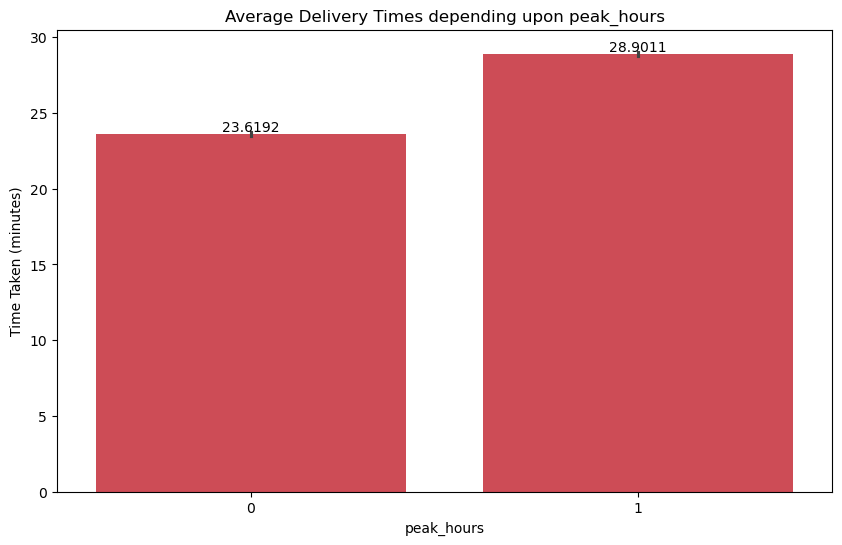

In [122]:

# average delivery times differ between peak hours and off-peak hours
plt.figure(figsize =(10,6))
ax = sns.barplot(x="peak_hours", y="time_taken_min", data=df,color = "#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times depending upon peak_hours")
plt.xlabel("peak_hours")
plt.ylabel("Time Taken (minutes)")
plt.show()


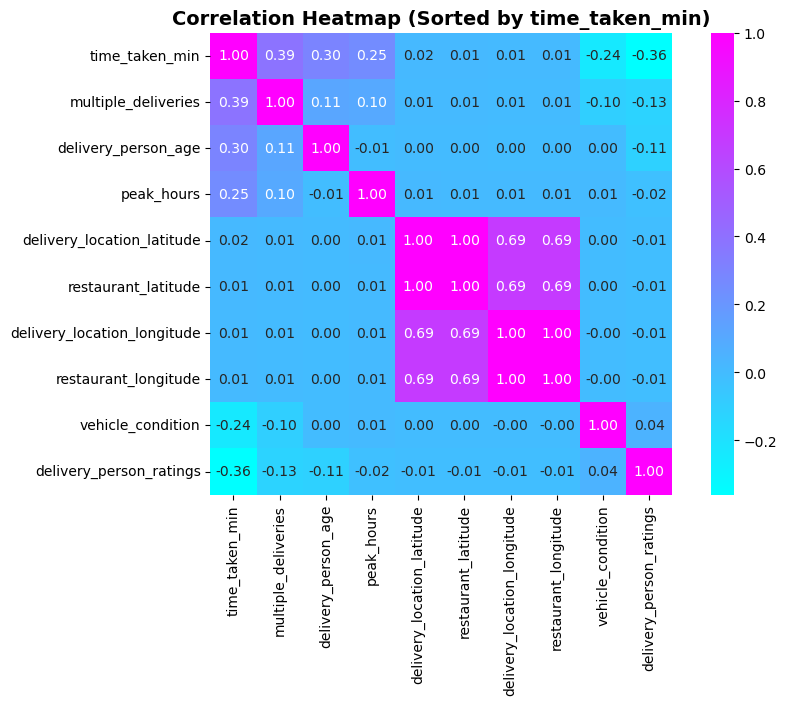

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr = numeric_columns.corr()

# Select correlation with the target variable (time_taken_min)
target_corr = corr["time_taken_min"].sort_values(ascending=False)

# Reorder columns by correlation strength (target on top)
sorted_cols = target_corr.index

# Create a sorted correlation matrix
sorted_corr = corr.loc[sorted_cols, sorted_cols]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_corr, cmap="cool", annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap (Sorted by time_taken_min)", fontsize=14, fontweight="bold")
plt.show()


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           29601 non-null  object        
 1   delivery_person_id           29601 non-null  object        
 2   delivery_person_age          29601 non-null  float64       
 3   delivery_person_ratings      29601 non-null  float64       
 4   restaurant_latitude          29601 non-null  float64       
 5   restaurant_longitude         29601 non-null  float64       
 6   delivery_location_latitude   29601 non-null  float64       
 7   delivery_location_longitude  29601 non-null  float64       
 8   order_date                   29601 non-null  datetime64[ns]
 9   time_orderd                  29601 non-null  datetime64[ns]
 10  time_order_picked            29601 non-null  object        
 11  weather_conditions           29601 non-nu

In [125]:
import numpy as np

# ==========================================================
# 🌍 Function to calculate distance between two GPS coordinates
# ==========================================================
def haversine(lat1, lon1, lat2, lon2):
    """
    Compute the great-circle distance between two points on Earth using
    the Haversine formula.
    
    Parameters:
    -----------
    lat1, lon1 : float or array-like
        Latitude and longitude of the first location (in decimal degrees)
    lat2, lon2 : float or array-like
        Latitude and longitude of the second location (in decimal degrees)
    
    Returns:
    --------
    distance : float or array-like
        Distance between the two points, in kilometers.
    """
    R = 6371  # 🌎 Earth's radius in kilometers
    
    # Convert decimal degrees to radians for trigonometric functions
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Compute differences between latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Apply the Haversine formula
    a = (
        np.sin(dlat / 2)**2
        + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    )
    distance = 2 * R * np.arcsin(np.sqrt(a))
    return distance

# ==========================================================
# 🧮 Calculate distance for each delivery record
# ==========================================================
df["distance_km"] = haversine(
    df["restaurant_latitude"], df["restaurant_longitude"],
    df["delivery_location_latitude"], df["delivery_location_longitude"]
)

# ==========================================================
# 📊 Summarize computed distances
# ==========================================================
print(df["distance_km"].describe())


count    29601.000000
mean         9.560696
std          5.623486
min          1.465067
25%          4.656607
50%          9.157921
75%         13.631229
max         20.969489
Name: distance_km, dtype: float64


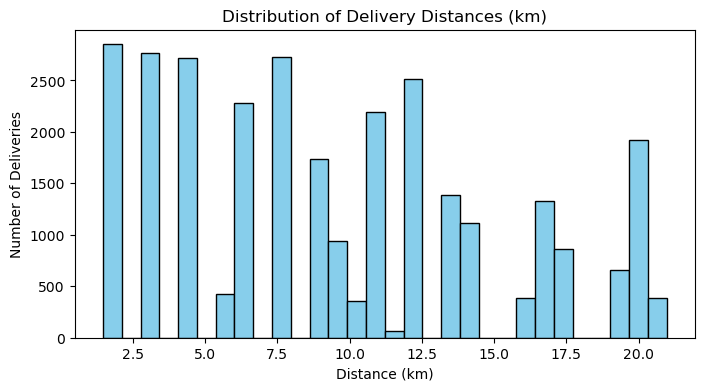

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(df["distance_km"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Delivery Distances (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Deliveries")
plt.show()


In [127]:
df.isnull().sum()

id                             0
delivery_person_id             0
delivery_person_age            0
delivery_person_ratings        0
restaurant_latitude            0
restaurant_longitude           0
delivery_location_latitude     0
delivery_location_longitude    0
order_date                     0
time_orderd                    0
time_order_picked              0
weather_conditions             0
road_traffic_density           0
vehicle_condition              0
type_of_order                  0
type_of_vehicle                0
multiple_deliveries            0
festival                       0
city                           0
time_taken_min                 0
order_month                    0
age_bins                       0
peak_hours                     0
distance_km                    0
dtype: int64

In [128]:
df.shape

(29601, 24)

In [129]:
# ==========================================================
# 🕒 Step 1: Ensure 'order_date' is in proper datetime format
# ==========================================================
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
# Converts 'order_date' from string to datetime.
# 'errors="coerce"' replaces invalid or unparseable dates with NaT (missing).

# ==========================================================
# ⏰ Step 2: Extract only the time part from 'time_order_picked'
# ==========================================================
df['time_order_picked'] = pd.to_datetime(df['time_order_picked'], errors='coerce').dt.time
# Converts the 'time_order_picked' column (which may include full datetime or string)
# into just a Python time object (HH:MM:SS).
# This isolates the time component, discarding any date information.

# ==========================================================
# 📅 Step 3: Combine date and time into a single datetime column
# ==========================================================
df['pickup_datetime'] = pd.to_datetime(
    df['order_date'].dt.strftime('%Y-%m-%d') + ' ' + df['time_order_picked'].astype(str),
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)
# This merges 'order_date' (date) and 'time_order_picked' (time) into one complete timestamp.
# Example:
#   order_date         = 2022-03-10
#   time_order_picked  = 15:30:00
#   → pickup_datetime   = 2022-03-10 15:30:00
#
# 'errors="coerce"' ensures that if any row has an invalid or missing time, it becomes NaT instead of crashing.


C:\Users\User\AppData\Local\Temp\ipykernel_13672\2024408990.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_order_picked'] = pd.to_datetime(df['time_order_picked'], errors='coerce').dt.time


In [130]:
df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,order_month,age_bins,peak_hours,distance_km,pickup_datetime
0,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,1900-01-01 14:55:00,...,motorcycle,1.0,No,Metropolitian,23,Feb,20-24,0,6.242319,2022-02-13 15:05:00
1,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,1900-01-01 17:30:00,...,scooter,1.0,No,Metropolitian,21,Mar,20-24,1,13.787860,2022-03-04 17:40:00
2,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,1900-01-01 09:20:00,...,motorcycle,0.0,No,Metropolitian,20,Feb,30-34,0,2.930258,2022-02-13 09:30:00
3,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,1900-01-01 19:50:00,...,scooter,1.0,No,Metropolitian,41,Feb,20-24,1,19.396618,2022-02-14 20:05:00
4,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,1900-01-01 20:25:00,...,electric_scooter,1.0,No,Metropolitian,20,Apr,25-29,1,13.763977,2022-04-02 20:35:00


In [131]:
df.isnull().sum()

id                                0
delivery_person_id                0
delivery_person_age               0
delivery_person_ratings           0
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                       0
time_order_picked              3241
weather_conditions                0
road_traffic_density              0
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries               0
festival                          0
city                              0
time_taken_min                    0
order_month                       0
age_bins                          0
peak_hours                        0
distance_km                       0
pickup_datetime                3241
dtype: int64

In [132]:
# Drop rows with missing pickup time or datetime
df = df.dropna(subset=['time_order_picked', 'pickup_datetime']).reset_index(drop=True)

print(f"✅ Dataset cleaned: {len(df)} rows remaining.")


✅ Dataset cleaned: 26360 rows remaining.


In [133]:
# Ensure both order_date and time_orderd are clean
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['time_orderd'] = pd.to_datetime(df['time_orderd'], format='%H:%M', errors='coerce').dt.time

# Combine cleanly into full order datetime
df['order_datetime'] = pd.to_datetime(
    df['order_date'].dt.strftime('%Y-%m-%d') + ' ' + df['time_orderd'].astype(str),
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)


In [134]:
df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,multiple_deliveries,festival,city,time_taken_min,order_month,age_bins,peak_hours,distance_km,pickup_datetime,order_datetime
0,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,...,1.0,No,Metropolitian,23,Feb,20-24,0,6.242319,2022-02-13 15:05:00,2022-02-13 14:55:00
1,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,...,1.0,No,Metropolitian,21,Mar,20-24,1,13.787860,2022-03-04 17:40:00,2022-03-04 17:30:00
2,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,...,0.0,No,Metropolitian,20,Feb,30-34,0,2.930258,2022-02-13 09:30:00,2022-02-13 09:20:00
3,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50:00,...,1.0,No,Metropolitian,41,Feb,20-24,1,19.396618,2022-02-14 20:05:00,2022-02-14 19:50:00
4,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,20:25:00,...,1.0,No,Metropolitian,20,Apr,25-29,1,13.763977,2022-04-02 20:35:00,2022-04-02 20:25:00


In [135]:
df['order_datetime'].isna().sum()

0

In [136]:
# Compute pickup delay (in minutes)
df['pickup_delay_min'] = (
    df['pickup_datetime'] - df['order_datetime']
).dt.total_seconds() / 60

# Compute total delivery time
df['total_delivery_time_min'] = df['time_taken_min'] + df['pickup_delay_min']


In [137]:
df[['order_datetime', 'pickup_datetime', 'pickup_delay_min', 'total_delivery_time_min']].isna().sum()


order_datetime             0
pickup_datetime            0
pickup_delay_min           0
total_delivery_time_min    0
dtype: int64

In [138]:
# Extract day of week (0 = Monday, 6 = Sunday)
df['order_dayofweek'] = df['order_date'].dt.dayofweek

# Create weekend flag (Saturday=5, Sunday=6)
df['is_weekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [139]:
df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,order_month,age_bins,peak_hours,distance_km,pickup_datetime,order_datetime,pickup_delay_min,total_delivery_time_min,order_dayofweek,is_weekend
0,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55:00,...,Feb,20-24,0,6.242319,2022-02-13 15:05:00,2022-02-13 14:55:00,10.0,33.0,6,1
1,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30:00,...,Mar,20-24,1,13.787860,2022-03-04 17:40:00,2022-03-04 17:30:00,10.0,31.0,4,0
2,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20:00,...,Feb,30-34,0,2.930258,2022-02-13 09:30:00,2022-02-13 09:20:00,10.0,30.0,6,1
3,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50:00,...,Feb,20-24,1,19.396618,2022-02-14 20:05:00,2022-02-14 19:50:00,15.0,56.0,0,0
4,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-04-02,20:25:00,...,Apr,25-29,1,13.763977,2022-04-02 20:35:00,2022-04-02 20:25:00,10.0,30.0,5,1


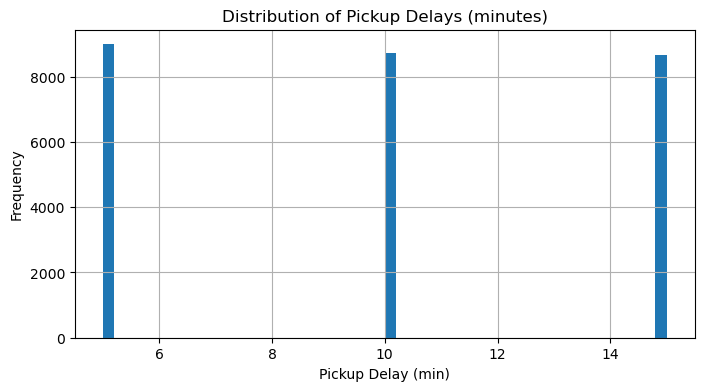

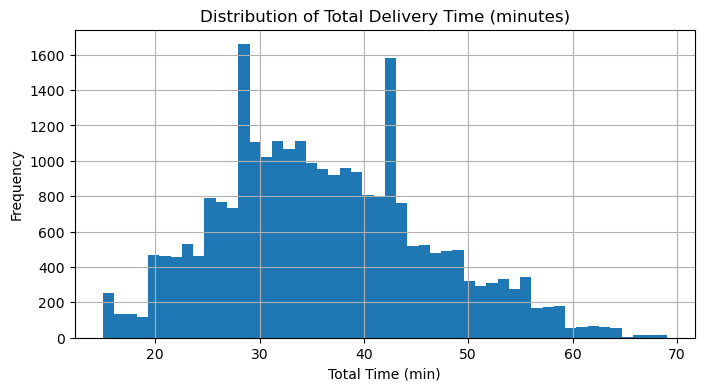

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['pickup_delay_min'].hist(bins=50)
plt.title("Distribution of Pickup Delays (minutes)")
plt.xlabel("Pickup Delay (min)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
df['total_delivery_time_min'].hist(bins=50)
plt.title("Distribution of Total Delivery Time (minutes)")
plt.xlabel("Total Time (min)")
plt.ylabel("Frequency")
plt.show()


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           26360 non-null  object        
 1   delivery_person_id           26360 non-null  object        
 2   delivery_person_age          26360 non-null  float64       
 3   delivery_person_ratings      26360 non-null  float64       
 4   restaurant_latitude          26360 non-null  float64       
 5   restaurant_longitude         26360 non-null  float64       
 6   delivery_location_latitude   26360 non-null  float64       
 7   delivery_location_longitude  26360 non-null  float64       
 8   order_date                   26360 non-null  datetime64[ns]
 9   time_orderd                  26360 non-null  object        
 10  time_order_picked            26360 non-null  object        
 11  weather_conditions           26360 non-nu

In [142]:
df['hour_of_order'] = df['order_datetime'].dt.hour
df['day_of_month'] = df['order_datetime'].dt.day
df['week_of_year'] = df['order_datetime'].dt.isocalendar().week.astype(int)


In [143]:
df['order_hour'] = pd.to_datetime(df['time_orderd'], format='%H:%M:%S', errors='coerce').dt.hour


In [144]:
df['order_hour']

0        14
1        17
2         9
3        19
4        20
         ..
26355    10
26356    21
26357     9
26358    18
26359    11
Name: order_hour, Length: 26360, dtype: int32

In [156]:
df['distance_traffic'] = df['distance_km'] * df['peak_hours']
df['rating_vehicle'] = df['delivery_person_ratings'] * df['vehicle_condition']
df['delay_weekend'] = df['peak_hours'] * df['is_weekend']


In [157]:
df.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weather_conditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken_min',
       'order_month', 'age_bins', 'peak_hours', 'distance_km',
       'pickup_datetime', 'order_datetime', 'pickup_delay_min',
       'total_delivery_time_min', 'order_dayofweek', 'is_weekend',
       'hour_of_order', 'day_of_month', 'week_of_year', 'order_hour',
       'distance_traffic', 'rating_vehicle', 'delay_weekend'],
      dtype='object')

In [158]:
df.to_csv("final_cleaned_delivery_dataset.csv", index=False)
print("✅ Final dataset saved successfully!")


✅ Final dataset saved successfully!


In [162]:
selected_features = [
    # 🧮 Numeric Features
    'delivery_person_age',
    'delivery_person_ratings',
    'vehicle_condition',
    'multiple_deliveries',
    'peak_hours',
    'distance_km',
    'order_dayofweek',
    'is_weekend',
    'hour_of_order',
    'day_of_month',
    'week_of_year',
    'distance_traffic',
    'rating_vehicle',
    'delay_weekend',
    
    
    # 🏷️ Categorical Features
    'weather_conditions',
    'road_traffic_density',
    'type_of_order',
    'type_of_vehicle',
    'festival',
    'city',
    'order_month',
  
]


### Predicting Delivery Time based on the Given Circumstance

In [163]:
# =========================================================
# ✅ Step 1: Prepare Data (No Leakage)
# =========================================================

# Target variable
y = df['total_delivery_time_min']

# Features selected (all available before delivery completion)
X = df[selected_features]

# =========================================================
# ✅ Step 2: Split into Train/Test
# =========================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [164]:
X_train.head()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,peak_hours,distance_km,order_dayofweek,is_weekend,hour_of_order,day_of_month,...,distance_traffic,rating_vehicle,delay_weekend,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city,order_month
575,25.0,4.6,0,1.0,1,10.707675,0,0,19,14,...,10.707675,0.0,0,Fog,Jam,Drinks,motorcycle,No,Metropolitian,Mar
15619,33.0,4.9,1,1.0,0,13.680920,2,0,22,2,...,0.000000,4.9,0,Sandstorms,Low,Drinks,scooter,No,Metropolitian,Mar
1023,31.0,4.7,0,1.0,0,20.851557,1,0,23,8,...,0.000000,0.0,0,Stormy,Low,Meal,motorcycle,No,Metropolitian,Mar
9434,34.0,4.9,2,1.0,1,9.178138,5,1,18,5,...,9.178138,9.8,1,Fog,Medium,Drinks,electric_scooter,No,Metropolitian,Mar
9070,32.0,4.7,0,0.0,0,19.915136,3,0,23,10,...,0.000000,0.0,0,Fog,Low,Snack,motorcycle,No,Urban,Mar


In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21088 entries, 575 to 23654
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delivery_person_age      21088 non-null  float64
 1   delivery_person_ratings  21088 non-null  float64
 2   vehicle_condition        21088 non-null  int64  
 3   multiple_deliveries      21088 non-null  float64
 4   peak_hours               21088 non-null  int64  
 5   distance_km              21088 non-null  float64
 6   order_dayofweek          21088 non-null  int32  
 7   is_weekend               21088 non-null  int64  
 8   hour_of_order            21088 non-null  int32  
 9   day_of_month             21088 non-null  int32  
 10  week_of_year             21088 non-null  int32  
 11  distance_traffic         21088 non-null  float64
 12  rating_vehicle           21088 non-null  float64
 13  delay_weekend            21088 non-null  int64  
 14  weather_conditions       

In [166]:
y_train

575      50.0
15619    35.0
1023     35.0
9434     31.0
9070     49.0
         ... 
21575    41.0
5390     59.0
860      38.0
15795    20.0
23654    43.0
Name: total_delivery_time_min, Length: 21088, dtype: float64

In [167]:
# ✅ Step 3: Preprocessing
num_cols = [
    'delivery_person_age',
    'delivery_person_ratings',
    'multiple_deliveries',
    'peak_hours',
    'distance_km',
    'order_dayofweek',
    'is_weekend',      # ✅ keep as numeric (binary flag)
    'hour_of_order',
    'day_of_month',
    'week_of_year',
    'distance_traffic',
    'rating_vehicle',
    'delay_weekend',
  
]

cat_cols = [
    'vehicle_condition',
    'weather_conditions',
    'road_traffic_density',
    'type_of_order',
    'type_of_vehicle',
    'festival',
    'city',
    'order_month'
]


In [168]:


# =========================================================


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# =========================================================
# ✅ Step 4: Define models and parameter grids
# =========================================================
models = {
    'Lasso': (Lasso(random_state=42), {'model__alpha': [0.01, 0.1, 1.0, 10.0]}),
    'Ridge': (Ridge(random_state=42), {'model__alpha': [0.01, 0.1, 1.0, 10.0]}),
    'RandomForest': (
        RandomForestRegressor(random_state=42),
        {'model__n_estimators': [100, 200],
         'model__max_depth': [10, 20, None],
         'model__min_samples_split': [2, 5]}
    ),
    'GradientBoosting': (
        GradientBoostingRegressor(random_state=42),
        {'model__n_estimators': [100, 200],
         'model__learning_rate': [0.05, 0.1],
         'model__max_depth': [3, 5]}
    ),
    'XGBoost': (
        XGBRegressor(random_state=42, objective='reg:squarederror'),
        {'model__n_estimators': [100, 200],
         'model__learning_rate': [0.05, 0.1],
         'model__max_depth': [3, 5]}
    ),
    'SVR': (
        SVR(),
        {'model__kernel': ['linear', 'rbf'], 'model__C': [0.1, 1, 10]}
    )
}

# =========================================================
# ✅ Step 5: Scoring setup and KFold
# =========================================================
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

results = []

# =========================================================
# ✅ Step 6: Loop over models with GridSearchCV + Cross-Validation
# =========================================================
for name, (model, params) in models.items():
    print(f"\n🔍 Running GridSearchCV + Cross-Validation for: {name}")
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    grid = GridSearchCV(
        pipe,
        param_grid=params,
        cv=cv,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        return_train_score=True
    )
    grid.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid.best_estimator_
    
    # Cross-validation with train/val tracking
    cv_results = cross_validate(
        best_model, X_train, y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Train_MAE': -np.mean(cv_results['train_mae']),
        'Val_MAE': -np.mean(cv_results['test_mae']),
        'Train_R²': np.mean(cv_results['train_r2']),
        'Val_R²': np.mean(cv_results['test_r2'])
    })

# =========================================================
# ✅ Step 7: Results Summary
# =========================================================
cv_results_df = pd.DataFrame(results).sort_values(by='Val_R²', ascending=False)
print("\n📊 Cross-Validation + GridSearch Results:")
display(cv_results_df)

# =========================================================
# ✅ Step 8: Evaluate best model on final test set
# =========================================================
best_name = cv_results_df.iloc[0]['Model']
print(f"\n🏆 Best model based on CV: {best_name}")

best_model = models[best_name][0]
final_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', best_model)
])

final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)

print(f"\n📘 Final Test Performance for {best_name}:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"R²:  {r2_score(y_test, y_pred):.4f}")



🔍 Running GridSearchCV + Cross-Validation for: Lasso

🔍 Running GridSearchCV + Cross-Validation for: Ridge

🔍 Running GridSearchCV + Cross-Validation for: RandomForest

🔍 Running GridSearchCV + Cross-Validation for: GradientBoosting

🔍 Running GridSearchCV + Cross-Validation for: XGBoost

🔍 Running GridSearchCV + Cross-Validation for: SVR

📊 Cross-Validation + GridSearch Results:


,Model,Best Params,Train_MAE,Val_MAE,Train_R²,Val_R²
2,RandomForest,"{'model__max_depth': 10, 'model__min_samples_s...",4.051517,4.611079,0.748305,0.678740
3,GradientBoosting,"{'model__learning_rate': 0.1, 'model__max_dept...",4.390414,4.651755,0.707320,0.671379
4,XGBoost,"{'model__learning_rate': 0.05, 'model__max_dep...",4.400927,4.657811,0.705623,0.671252
5,SVR,"{'model__C': 10, 'model__kernel': 'rbf'}",4.325862,5.157689,0.671432,0.587937
1,Ridge,{'model__alpha': 0.01},5.721207,5.732085,0.491857,0.489898
0,Lasso,{'model__alpha': 0.01},5.723691,5.732255,0.491357,0.489821



🏆 Best model based on CV: RandomForest

📘 Final Test Performance for RandomForest:
MAE: 4.722
R²:  0.6647


Full Fine-Tuning Pipeline for RandomForest + XGBoost
This pipeline:
Performs preprocessing (scaling + encoding)
Uses GridSearchCV for both models
Prints best parameters and evaluation metrics (MAE & R²)

Full Fine-Tuning Pipeline for RandomForest + XGBoost
This pipeline:
- Performs preprocessing (scaling + encoding)
- Uses GridSearchCV for both models
- Prints best parameters and evaluation metrics (MAE & R²)

In [169]:
# =========================================================
# ✅ Step 1: Imports
# =========================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# =========================================================
# ✅ Step 2: Features & Target
# =========================================================

# =========================================================
# ✅ Step 4: Preprocessing
# =========================================================
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# =========================================================
# ✅ Step 5: Model Definitions
# =========================================================
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grids
param_grid_rf = {
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [10, 15, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

param_dist_xgb = {
    'model__n_estimators': [200, 300, 400],
    'model__learning_rate': [0.05, 0.08, 0.1],
    'model__max_depth': [6, 8, 10],
    'model__subsample': [0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9],
    'model__reg_lambda': [1, 5],
    'model__reg_alpha': [0, 0.5],
    'model__gamma': [0, 0.1]
}

# =========================================================
# ✅ Step 6: Cross-Validation Setup
# =========================================================
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

# =========================================================
# ✅ Step 7: Tune RandomForest with GridSearchCV
# =========================================================
print("\n🌲 Tuning Random Forest...")

pipe_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', rf_model)
])

grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
results.append({
    'Model': 'RandomForest',
    'Best Params': grid_rf.best_params_,
    'Train MAE': mean_absolute_error(y_train, best_rf.predict(X_train)),
    'Test MAE': mean_absolute_error(y_test, y_pred_rf),
    'Train R²': r2_score(y_train, best_rf.predict(X_train)),
    'Test R²': r2_score(y_test, y_pred_rf)
})

print("\n🏆 Random Forest Best Parameters:")
print(grid_rf.best_params_)
print(f"📈 CV R²: {grid_rf.best_score_:.4f}")
print(f"📘 Test MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"📘 Test R²:  {r2_score(y_test, y_pred_rf):.3f}")

# =========================================================
# ✅ Step 8: Tune XGBoost with RandomizedSearchCV
# =========================================================
print("\n⚡ Tuning XGBoost...")

pipe_xgb = Pipeline([
    ('preprocess', preprocessor),
    ('model', xgb_model)
])

rand_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,             # faster than grid
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rand_xgb.fit(X_train, y_train)
best_xgb = rand_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
results.append({
    'Model': 'XGBoost',
    'Best Params': rand_xgb.best_params_,
    'Train MAE': mean_absolute_error(y_train, best_xgb.predict(X_train)),
    'Test MAE': mean_absolute_error(y_test, y_pred_xgb),
    'Train R²': r2_score(y_train, best_xgb.predict(X_train)),
    'Test R²': r2_score(y_test, y_pred_xgb)
})

print("\n🏆 XGBoost Best Parameters:")
print(rand_xgb.best_params_)
print(f"📈 CV R²: {rand_xgb.best_score_:.4f}")
print(f"📘 Test MAE: {mean_absolute_error(y_test, y_pred_xgb):.3f}")
print(f"📘 Test R²:  {r2_score(y_test, y_pred_xgb):.3f}")

# =========================================================
# ✅ Step 9: Results Summary
# =========================================================
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
print("\n📊 Fine-Tuning Results Summary:")
display(results_df)



🌲 Tuning Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

🏆 Random Forest Best Parameters:
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 400}
📈 CV R²: 0.6627
📘 Test MAE: 4.714
📘 Test R²:  0.668

⚡ Tuning XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

🏆 XGBoost Best Parameters:
{'model__subsample': 1.0, 'model__reg_lambda': 5, 'model__reg_alpha': 0.5, 'model__n_estimators': 400, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__gamma': 0, 'model__colsample_bytree': 0.8}
📈 CV R²: 0.6756
📘 Test MAE: 4.633
📘 Test R²:  0.678

📊 Fine-Tuning Results Summary:


,Model,Best Params,Train MAE,Test MAE,Train R²,Test R²
1,XGBoost,"{'model__subsample': 1.0, 'model__reg_lambda':...",3.989130,4.633038,0.757254,0.678280
0,RandomForest,"{'model__max_depth': None, 'model__max_feature...",3.408636,4.713512,0.823324,0.667542


In [170]:
X_train.columns

Index(['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition',
       'multiple_deliveries', 'peak_hours', 'distance_km', 'order_dayofweek',
       'is_weekend', 'hour_of_order', 'day_of_month', 'week_of_year',
       'distance_traffic', 'rating_vehicle', 'delay_weekend',
       'weather_conditions', 'road_traffic_density', 'type_of_order',
       'type_of_vehicle', 'festival', 'city', 'order_month'],
      dtype='object')


🏆 Top 15 Most Important Features in XGBoost:


,Feature,Importance
24,road_traffic_density_Low,0.342969
20,weather_conditions_Sunny,0.073186
33,festival_No,0.054185
23,road_traffic_density_Jam,0.048551
13,vehicle_condition_0,0.046614
17,weather_conditions_Fog,0.046267
16,weather_conditions_Cloudy,0.043753
34,festival_Yes,0.043014
1,delivery_person_ratings,0.038018
2,multiple_deliveries,0.036540


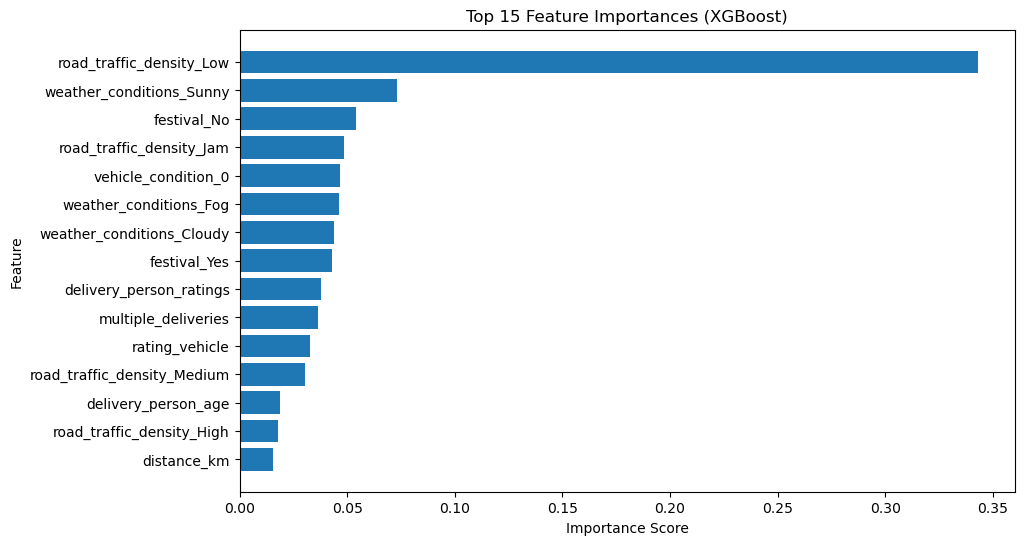

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# =========================================================
# ✅ Step 1: Extract trained XGBRegressor
# =========================================================
xgb_native = best_xgb.named_steps['model'] if 'model' in best_xgb.named_steps else best_xgb

# =========================================================
# ✅ Step 2: Get feature names after preprocessing
# =========================================================
encoder = best_xgb.named_steps['preprocess']
num_features = num_cols
cat_features = list(encoder.named_transformers_['cat'].get_feature_names_out(cat_cols))
all_features = num_features + cat_features

# =========================================================
# ✅ Step 3: Get feature importances
# =========================================================
importances = xgb_native.feature_importances_

# Combine into DataFrame
feat_imp = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 15
print("\n🏆 Top 15 Most Important Features in XGBoost:")
display(feat_imp.head(15))

# =========================================================
# ✅ Step 4: Plot
# =========================================================
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'].head(15)[::-1], feat_imp['Importance'].head(15)[::-1])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [171]:
## Shap analysis

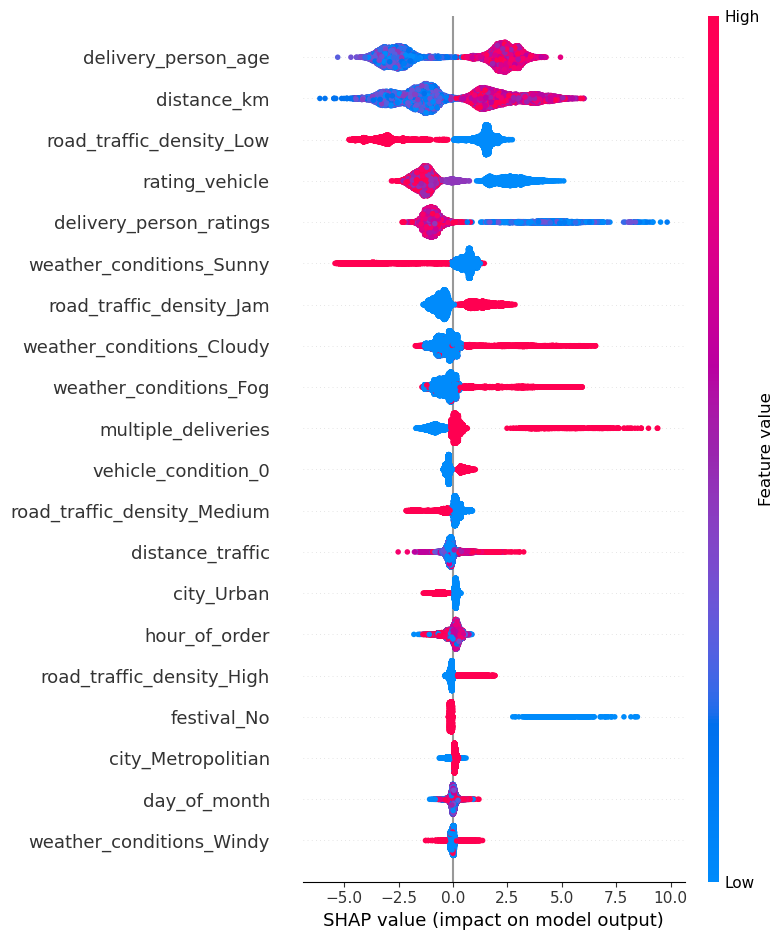

In [173]:
import shap

# Extract the trained model and preprocessor
xgb_native = best_xgb.named_steps['model']
preprocessor = best_xgb.named_steps['preprocess']

# Transform training data
X_train_preprocessed = preprocessor.transform(X_train)

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_native)
shap_values = explainer(X_train_preprocessed)

# Summary plot (global importance)
shap.summary_plot(shap_values, X_train_preprocessed, feature_names=all_features)

# Optional: force plot for a single prediction
sample_index = 10
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index].values,
    feature_names=all_features
)


In [174]:
import joblib

# Save (dump) the trained pipeline
joblib.dump(best_xgb, 'xgboost_delivery_time_model.pkl')

print("✅ Model pipeline saved successfully as 'xgboost_delivery_time_model.pkl'")


✅ Model pipeline saved successfully as 'xgboost_delivery_time_model.pkl'


In [176]:
# Sample input
sample = pd.DataFrame({
    'delivery_person_age': [28],
    'delivery_person_ratings': [4.6],
    'multiple_deliveries': [1.0],
    'peak_hours': [1],
    'distance_km': [5.3],
    'order_dayofweek': [4],
    'is_weekend': [0],
    'hour_of_order': [18],
    'day_of_month': [20],
    'week_of_year': [20],
    'vehicle_condition': [2],
    'weather_conditions': ['Sunny'],
    'road_traffic_density': ['Medium'],
    'type_of_order': ['Buffet'],
    'type_of_vehicle': ['motorcycle'],
    'festival': ['No'],
    'city': ['Urban'],
    'order_month': ['May']
})

# =========================================================
# ✅ Add the 3 engineered features (same logic used during training)
# =========================================================
sample['distance_traffic'] = sample['distance_km'] * sample['peak_hours']
sample['rating_vehicle'] = sample['delivery_person_ratings'] * sample['vehicle_condition']
sample['delay_weekend'] = sample['is_weekend'] * sample['peak_hours']

# ✅ Now predict safely
pred = model.predict(sample)
print(f"⏱️ Predicted Total Delivery Time: {pred[0]:.2f} minutes")


⏱️ Predicted Total Delivery Time: 24.95 minutes


### Model 2: DEleay or On time Delivery:

<Axes: xlabel='total_delivery_time_min', ylabel='Count'>

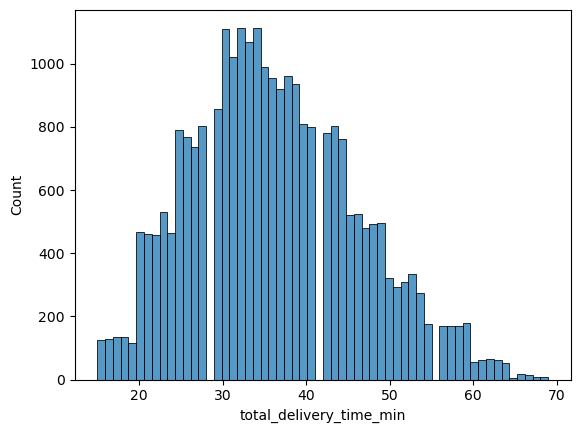

In [178]:
sns.histplot(x = 'total_delivery_time_min', data = df)

In [166]:
df['total_delivery_time_min'].mean()

36.21183611532625

In [179]:
df['total_delivery_time_min'].median()

35.0

In [180]:
df['avg_speed_vehicle'] = df.groupby('type_of_vehicle').apply(
    lambda x: np.mean(x['distance_km'] / (x['time_taken_min'] / 60))
).reindex(df['type_of_vehicle']).values


C:\Users\User\AppData\Local\Temp\ipykernel_13672\345177990.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['avg_speed_vehicle'] = df.groupby('type_of_vehicle').apply(


In [181]:
df['expected_travel_time'] = (df['distance_km'] / df['avg_speed_vehicle']) * 60


In [182]:
# Allowable total = expected_travel_time + typical pickup delay
median_pickup_delay = df['pickup_delay_min'].median()

df['expected_total_time'] = df['expected_travel_time'] + median_pickup_delay
tolerance = 0.10  # 10% grace period

df['is_delayed'] = (df['total_delivery_time_min'] > df['expected_total_time'] * (1 + tolerance)).astype(int)


In [183]:
df.iloc[0]

id                                          0xd987
delivery_person_id                   KOCRES16DEL01
delivery_person_age                           21.0
delivery_person_ratings                        4.7
restaurant_latitude                      10.003064
restaurant_longitude                     76.307589
delivery_location_latitude               10.043064
delivery_location_longitude              76.347589
order_date                     2022-02-13 00:00:00
time_orderd                               14:55:00
time_order_picked                         15:05:00
weather_conditions                          Stormy
road_traffic_density                          High
vehicle_condition                                1
type_of_order                                 Meal
type_of_vehicle                         motorcycle
multiple_deliveries                            1.0
festival                                        No
city                                 Metropolitian
time_taken_min                 

In [184]:
print(df['is_delayed'].value_counts(normalize=True))


is_delayed
1    0.500341
0    0.499659
Name: proportion, dtype: float64


In [185]:
y = df['is_delayed']


selected_features = [
    # 🧮 Numeric Features
    'delivery_person_age',
    'delivery_person_ratings',
    'vehicle_condition',
    'multiple_deliveries',
    'peak_hours',
    'distance_km',
    'order_dayofweek',
    'is_weekend',
    'hour_of_order',
    'day_of_month',
    'week_of_year',
    'distance_traffic',
    'rating_vehicle',
    'delay_weekend',
    # 🏷️ Categorical Features
    'weather_conditions',
    'road_traffic_density',
    'type_of_order',
    'type_of_vehicle',
    'festival',
    'city',
    'order_month',
  
]


# =========================================================
# ✅ Step 1: Prepare Data (No Leakage)
# =========================================================

# Target variable
y = df['total_delivery_time_min']

# Features selected (all available before delivery completion)
X = df[selected_features]

# =========================================================
# ✅ Step 2: Split into Train/Test
# =========================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)







In [186]:
X_train.columns

Index(['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition',
       'multiple_deliveries', 'peak_hours', 'distance_km', 'order_dayofweek',
       'is_weekend', 'hour_of_order', 'day_of_month', 'week_of_year',
       'distance_traffic', 'rating_vehicle', 'delay_weekend',
       'weather_conditions', 'road_traffic_density', 'type_of_order',
       'type_of_vehicle', 'festival', 'city', 'order_month'],
      dtype='object')

In [192]:
# =========================================================
# ✅ Step 1: Imports
# =========================================================
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# =========================================================
# ✅ Step 2: Define Target and Features
# =========================================================
y = df['is_delayed']

X = df[
    [
        'delivery_person_age', 'delivery_person_ratings', 'multiple_deliveries',
        'peak_hours', 'distance_km', 'order_dayofweek', 'is_weekend',
        'hour_of_order', 'day_of_month', 'week_of_year',
        'distance_traffic', 'rating_vehicle', 'delay_weekend',
        'vehicle_condition', 'weather_conditions', 'road_traffic_density',
        'type_of_order', 'type_of_vehicle', 'festival', 'city', 'order_month'
    ]
]

# =========================================================
# ✅ Step 3: Split Train/Test
# =========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# =========================================================
# ✅ Step 4: Preprocessor
# =========================================================
num_cols = [
    'delivery_person_age', 'delivery_person_ratings', 'multiple_deliveries',
    'peak_hours', 'distance_km', 'order_dayofweek', 'is_weekend',
    'hour_of_order', 'day_of_month', 'week_of_year',
    'distance_traffic', 'rating_vehicle', 'delay_weekend'
]

cat_cols = [
    'vehicle_condition', 'weather_conditions', 'road_traffic_density',
    'type_of_order', 'type_of_vehicle', 'festival', 'city', 'order_month'
]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# =========================================================
# ✅ Step 5: Define Models
# =========================================================
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', C=1, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'XGBoost': XGBClassifier(
        objective='binary:logistic',
        random_state=42,
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=5,
        reg_alpha=0.5,
        use_label_encoder=False,
        eval_metric='logloss'
    )
}

# =========================================================
# ✅ Step 6: Scoring + Cross-Validation Setup
# =========================================================
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# =========================================================
# ✅ Step 7: Train + Cross-Validate Each Model
# =========================================================
results = []

for name, model in models.items():
    print(f"\n🔍 Training and evaluating: {name} ...")
    
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    cv_results = cross_validate(
        pipe,
        X_train, y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )
    
    results.append({
        'Model': name,
        'Accuracy': np.mean(cv_results['test_accuracy']),
        'F1': np.mean(cv_results['test_f1']),
        'ROC_AUC': np.mean(cv_results['test_roc_auc']),
        'Precision': np.mean(cv_results['test_precision']),
        'Recall': np.mean(cv_results['test_recall'])
    })

# =========================================================
# ✅ Step 8: Results Summary
# =========================================================
results_df = pd.DataFrame(results).sort_values(by='ROC_AUC', ascending=False)
print("\n📊 Cross-Validation Performance Summary:")
display(results_df)

# =========================================================
# ✅ Step 9: Evaluate Best Model on Test Set
# =========================================================
best_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Model Based on ROC-AUC: {best_name}")

best_model = models[best_name]
final_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', best_model)
])
final_pipe.fit(X_train, y_train)

# Predict on test set
y_pred = final_pipe.predict(X_test)
y_proba = final_pipe.predict_proba(X_test)[:, 1]

print("\n📘 Final Test Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")



🔍 Training and evaluating: Logistic Regression ...

🔍 Training and evaluating: Random Forest ...

🔍 Training and evaluating: Gradient Boosting ...

🔍 Training and evaluating: SVM (RBF) ...

🔍 Training and evaluating: KNN ...

🔍 Training and evaluating: XGBoost ...

📊 Cross-Validation Performance Summary:


,Model,Accuracy,F1,ROC_AUC,Precision,Recall
5,XGBoost,0.886570,0.887244,0.886610,0.881694,0.892933
2,Gradient Boosting,0.885479,0.885926,0.885562,0.882328,0.889661
1,Random Forest,0.872250,0.871237,0.872300,0.878101,0.864534
3,SVM (RBF),0.864188,0.865816,0.864197,0.855397,0.876539
0,Logistic Regression,0.854941,0.856107,0.854946,0.849426,0.862927
4,KNN,0.819803,0.814074,0.819803,0.840874,0.788956



🏆 Best Model Based on ROC-AUC: XGBoost


C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📘 Final Test Classification Report:
              precision    recall  f1-score   support

           0     0.8902    0.8834    0.8868      2634
           1     0.8845    0.8912    0.8878      2638

    accuracy                         0.8873      5272
   macro avg     0.8874    0.8873    0.8873      5272
weighted avg     0.8874    0.8873    0.8873      5272

Test ROC-AUC: 0.9620
Test Accuracy: 0.8873


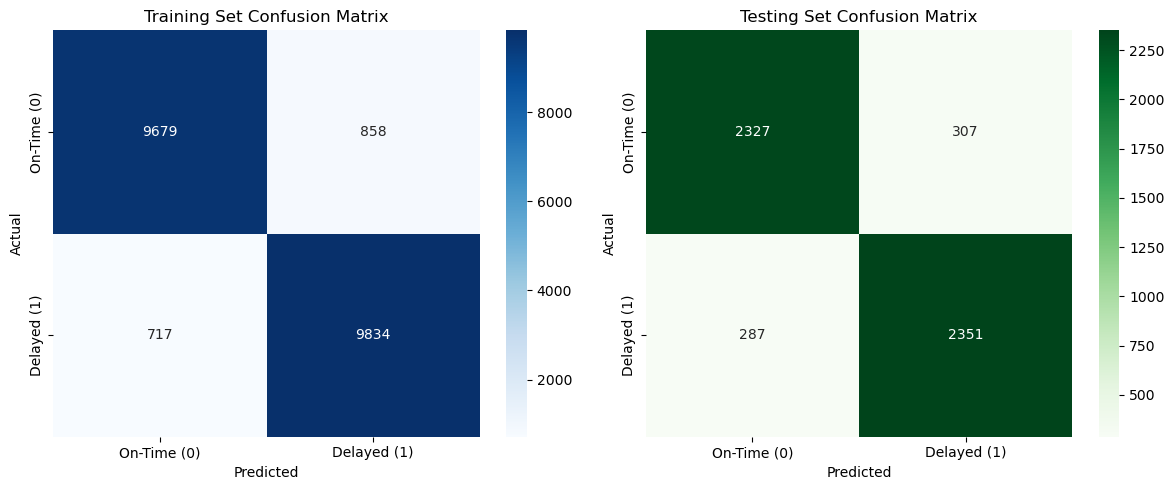

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predictions for training and test sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels
labels = ["On-Time (0)", "Delayed (1)"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Training Set Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(labels)
axes[0].set_yticklabels(labels)

# Test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Testing Set Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(labels)
axes[1].set_yticklabels(labels)

plt.tight_layout()
plt.show()


In [205]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("📘 Training Metrics:")
print(f"Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"F1 Score:  {f1_score(y_train, y_train_pred):.4f}")

print("\n📗 Testing Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_test_pred):.4f}")


📘 Training Metrics:
Accuracy:  0.9253
Precision: 0.9198
Recall:    0.9320
F1 Score:  0.9259

📗 Testing Metrics:
Accuracy:  0.8873
Precision: 0.8845
Recall:    0.8912
F1 Score:  0.8878


C:\Users\User\Miniconda3\envs\myConda\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


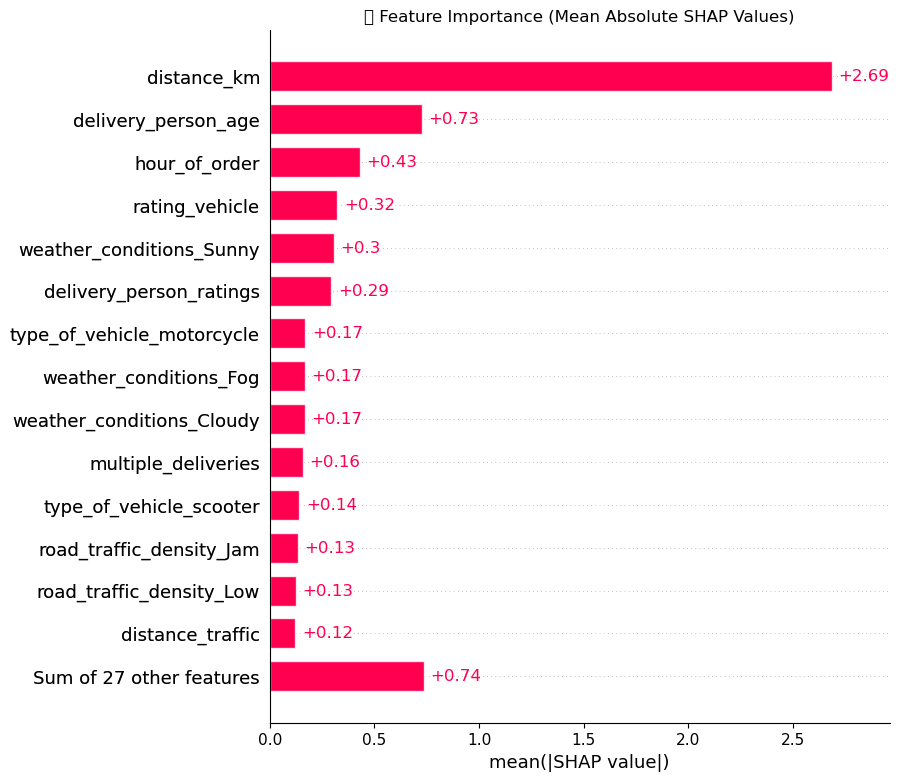

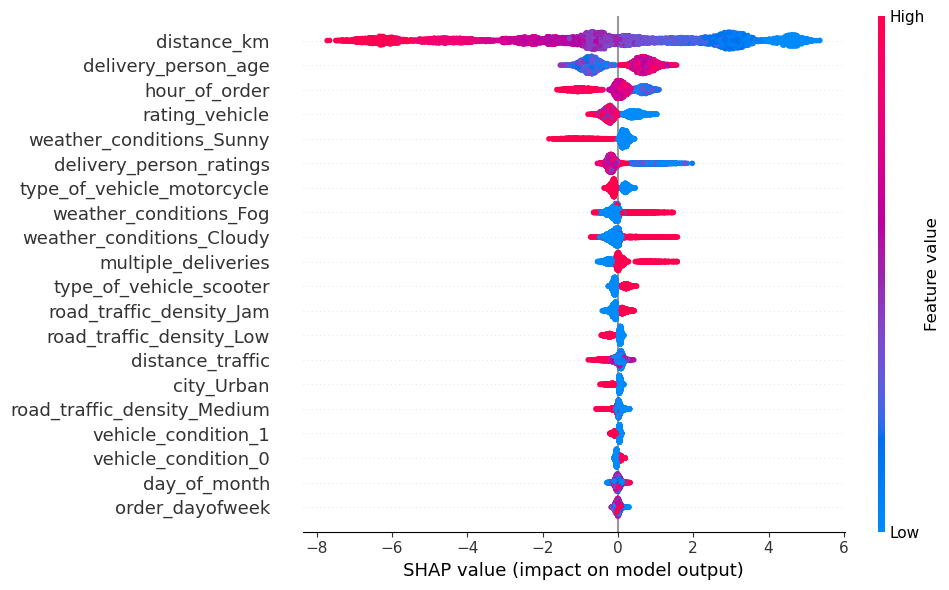


Explaining sample #5: Actual = 0


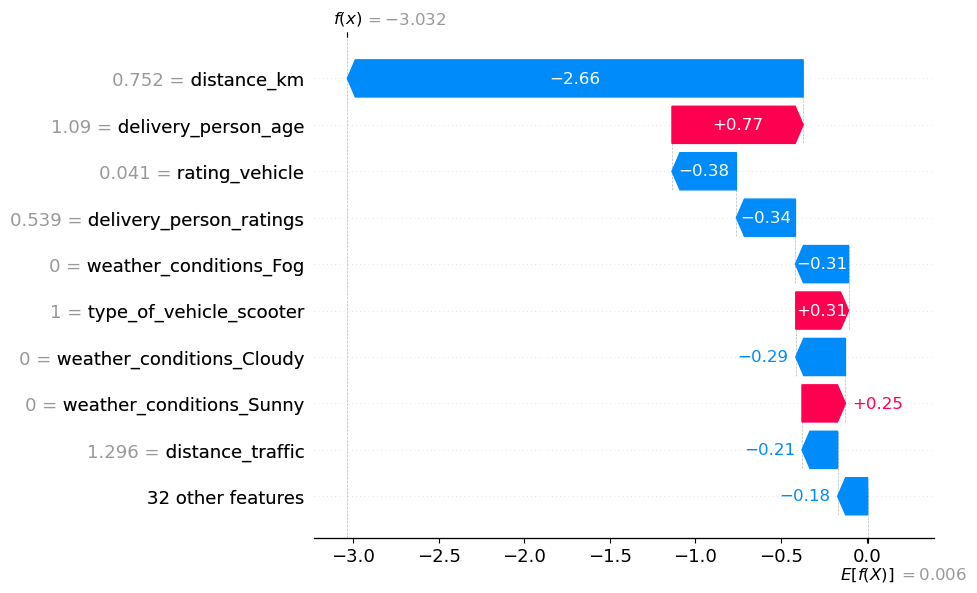

In [196]:
# =========================================================
# ✅ Step 1: Import libraries
# =========================================================
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# =========================================================
# ✅ Step 2: Extract model and preprocessor from pipeline
# =========================================================
model = pipe.named_steps['model']                # XGBClassifier
preprocessor = pipe.named_steps['preprocess']    # ColumnTransformer

# =========================================================
# ✅ Step 3: Get transformed test data and feature names
# =========================================================
# Transform the test data using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Get final feature names (numeric + one-hot encoded categorical)
num_features = num_cols
cat_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
all_features = num_features + cat_features

# Convert transformed test data into a DataFrame with proper column names
X_test_df = pd.DataFrame(X_test_transformed, columns=all_features)

# =========================================================
# ✅ Step 4: Create SHAP explainer for XGBoost
# =========================================================
# For XGBoost, TreeExplainer is most efficient and accurate
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_df)

# =========================================================
# ✅ Step 5: Feature Importance — Bar Plot
# =========================================================
plt.title("🔍 Feature Importance (Mean Absolute SHAP Values)")
shap.plots.bar(shap_values, max_display=15)
plt.show()

# =========================================================
# ✅ Step 6: Summary Plot — All Features
# =========================================================
shap.summary_plot(
    shap_values,
    X_test_df,
    feature_names=all_features,
    plot_size=(10, 6),
    show=True
)

# =========================================================
# ✅ Step 7: Explain a Single Prediction (Waterfall Plot)
# =========================================================
sample_idx = 5  # you can change this index
print(f"\nExplaining sample #{sample_idx}: Actual = {y_test.iloc[sample_idx]}")
shap.plots.waterfall(shap_values[sample_idx])



In [197]:
# Save bar plot
shap.plots.bar(shap_values, max_display=15, show=False)
plt.title("Feature Importance (Mean Absolute SHAP Values)")
plt.savefig("shap_bar_importance.png", bbox_inches='tight', dpi=300)
plt.close()

# Save summary plot
shap.summary_plot(shap_values, X_test_df, show=False)
plt.savefig("shap_summary_plot.png", bbox_inches='tight', dpi=300)
plt.close()


In [198]:
### Saving the model
import joblib

# Save the trained pipeline
joblib.dump(pipe, "delivery_delay_model.pkl")

print("✅ Model pipeline saved successfully as 'delivery_delay_model.pkl'")


✅ Model pipeline saved successfully as 'delivery_delay_model.pkl'


In [199]:
### Loading the model
import joblib

# Load the saved model
loaded_model = joblib.load("delivery_delay_model.pkl")

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [200]:
# Sample input for prediction
sample = pd.DataFrame({
    'delivery_person_age': [30],
    'delivery_person_ratings': [4.7],
    'multiple_deliveries': [1.0],
    'peak_hours': [1],
    'distance_km': [5.5],
    'order_dayofweek': [4],
    'is_weekend': [0],
    'hour_of_order': [19],
    'day_of_month': [15],
    'week_of_year': [20],
    'distance_traffic': [5.5 * 1],     # optional interaction term
    'rating_vehicle': [4.7 * 2],       # optional
    'delay_weekend': [0],
    'vehicle_condition': [2],
    'weather_conditions': ['Sunny'],
    'road_traffic_density': ['Medium'],
    'type_of_order': ['Snack'],
    'type_of_vehicle': ['motorcycle'],
    'festival': ['No'],
    'city': ['Urban'],
    'order_month': ['May']
})

# Predict delay probability
pred_proba = loaded_model.predict_proba(sample)[0][1]
pred_class = loaded_model.predict(sample)[0]

# Interpret the result
if pred_class == 1:
    print(f"🚨 Prediction: DELAYED (probability = {pred_proba:.2f})")
else:
    print(f"✅ Prediction: ON-TIME (probability = {pred_proba:.2f})")


🚨 Prediction: DELAYED (probability = 0.60)


## Prject End